In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET

In [92]:
data=pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# DATA ANALYSIS

In [56]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [57]:
data.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [58]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [59]:
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [60]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [94]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# DATA CLEANSING

In [62]:
data.Sex[data.Sex=="M"]=1
data.Sex[data.Sex=="F"]=2
data.Sex[data.Sex=="I"]=0

In [11]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [13]:
data.skew()

Sex               0.014980
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

In [15]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


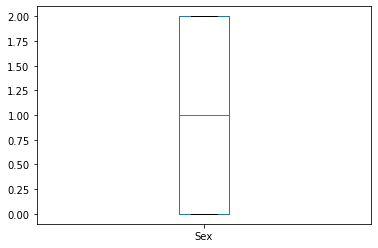

In [74]:
data["Sex"].plot.box()

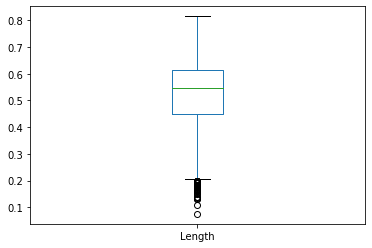

In [87]:
data["Length"].plot.box()

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(data["Rings"]))
z

array([1.57154357, 0.91001299, 0.28962385, ..., 0.28962385, 0.02057072,
       0.64095986])

In [89]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   83,  166,  167,  181,  232,  270,  275,  278,  294,
        310,  313,  314,  351,  355,  362,  375,  416,  417,  428,  431,
        433,  469,  478,  480,  501,  530,  572,  628,  673,  674,  675,
        678,  744,  754,  756,  811, 2108, 2176, 2180, 2199, 2201, 2209,
       2275, 2305, 2334, 2335, 2344, 2358, 2436, 2459, 2471, 3140, 3149,
       3151, 3193, 3280, 3359, 3924, 3930, 3944], dtype=int64),)


In [84]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64


In [85]:
print(data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))

      Diameter  Height  Length  Rings    Sex  Shell weight  Shucked weight  \
0        False   False   False  False  False         False           False   
1        False   False   False  False  False         False           False   
2        False   False   False  False  False         False           False   
3        False   False   False  False  False         False           False   
4        False   False   False  False  False         False           False   
...        ...     ...     ...    ...    ...           ...             ...   
4172     False   False   False  False  False         False           False   
4173     False   False   False  False  False         False           False   
4174     False   False   False  False  False         False           False   
4175     False   False   False  False  False         False           False   
4176     False   False   False  False  False         False           False   

      Viscera weight  Whole weight  
0              False      

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [86]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,2,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,2,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [16]:
from sklearn import preprocessing

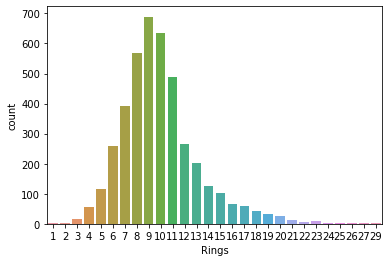

In [19]:
sns.countplot(x="Rings",data=data)

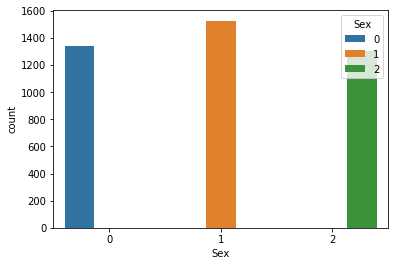

In [26]:
sns.countplot(x="Sex",hue="Sex",data=data)

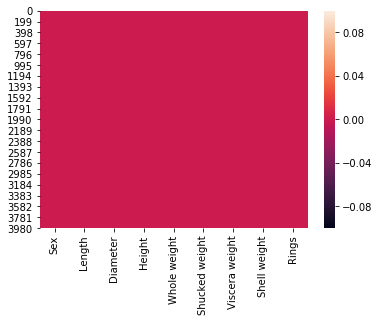

In [27]:
sns.heatmap(data.isnull())

# SPLITTING DATA INTO TRAIN AND TETSING PHASE

In [32]:
x=data.drop(["Rings"],axis=1)
y=data["Rings"]
x=preprocessing.normalize(x)

In [33]:
print(x)

[[0.76773938 0.34932142 0.28022488 ... 0.17235749 0.07754168 0.11516091]
 [0.88776632 0.31071821 0.23525808 ... 0.08833275 0.04305667 0.06214364]
 [0.88877755 0.23552605 0.18664328 ... 0.11398572 0.06288101 0.09332164]
 ...
 [0.53726985 0.32236191 0.25520318 ... 0.28233531 0.15446508 0.16547911]
 [0.79783422 0.24932319 0.1934748  ... 0.21182499 0.10411737 0.11807946]
 [0.37993576 0.26975439 0.21086435 ... 0.35922926 0.14304581 0.1880682 ]]


In [35]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.31,random_state=0)

In [44]:
x_train.shape

(2882, 8)

In [45]:
y_train.shape

(2882,)

In [46]:
x_test.shape

(1295, 8)

In [47]:
y_test.shape

(1295,)

# APPLYING MODEL AND ALOGORITHM

In [50]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [95]:
reg=DecisionTreeRegressor(random_state=41)
reg.fit(x_train,y_train)
pred=reg.predict(x_test)

In [96]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))

Mean Absolute Error: 2.14980694980695
Mean Squared Error: 9.093436293436293


In [97]:
print(r2_score(y_test,pred))

0.1289249277860698


In [98]:
lg=LinearRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.52137165453843

In [99]:
y_pred=lg.predict(x_test)

In [66]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

Mean Absolute Error: 1.556714452853083
Mean Squared Error: 5.255297373088435
0.4965865057994693


In [69]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=300,random_state=41)
rfc.fit(x_train,y_train)
print(rfc.score(x_train,y_train))
y_pred=rfc.predict(x_test)
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.0
Mean Absolute Error: 1.6864864864864866
Mean Squared Error: 6.384555984555985
0.38841298428458093


In [70]:
data1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

In [71]:
data1

,Actual,Predicted
668,13,13
1580,8,8
3784,11,9
463,5,4
2615,12,11
...,...,...
4063,11,10
846,11,9
3810,8,8
2947,10,11
